---
---

## Homework
---
> Note: sometimes your answer doesn't match one of the options exactly. 
> That's fine. 
> Select the option that's closest to your solution.


### Dataset
---
In this homework, we will use the lead scoring dataset Bank Marketing dataset. Download it from [here](https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv).

Or you can do it with `wget`:

```bash
wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv
```

In this dataset our desired target for classification task will be `converted` variable - has the client signed up to the platform or not. 


In [902]:
#!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv

In [903]:
import pandas as pd

In [904]:
df = pd.read_csv('course_lead_scoring.csv')
df.head()

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NaN,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NaN,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1


### Data preparation

* Check if the missing values are presented in the features.
* If there are missing values:
    * For caterogiral features, replace them with 'NA'
    * For numerical features, replace with with 0.0 


In [905]:
df.dtypes

lead_source                  object
industry                     object
number_of_courses_viewed      int64
annual_income               float64
employment_status            object
location                     object
interaction_count             int64
lead_score                  float64
converted                     int64
dtype: object

In [906]:
categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)
numerical_columns = list(df.dtypes[df.dtypes != 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

In [907]:
categorical_columns, numerical_columns

(['lead_source', 'industry', 'employment_status', 'location'],
 ['number_of_courses_viewed',
  'annual_income',
  'interaction_count',
  'lead_score',
  'converted'])

In [908]:
df.head().T

,0,1,2,3,4
lead_source,paid_ads,social_media,events,paid_ads,referral
industry,NaN,retail,healthcare,retail,education
number_of_courses_viewed,1,1,5,2,3
annual_income,79450.0,46992.0,78796.0,83843.0,85012.0
employment_status,unemployed,employed,unemployed,NaN,self_employed
location,south_america,south_america,australia,australia,europe
interaction_count,4,1,3,1,3
lead_score,0.94,0.8,0.69,0.87,0.62
converted,1,0,1,0,1


In [909]:
df[categorical_columns].isna().sum()

lead_source          128
industry             134
employment_status    100
location              63
dtype: int64

In [910]:
df[numerical_columns].isna().sum()

number_of_courses_viewed      0
annual_income               181
interaction_count             0
lead_score                    0
converted                     0
dtype: int64

In [911]:
df[categorical_columns] = df[categorical_columns].fillna('NA')
df[numerical_columns] = df[numerical_columns].fillna(0.0)


### Question 1

What is the most frequent observation (mode) for the column `industry`?

- `NA`
- `technology`
- `healthcare`
- `retail`


In [912]:
df.industry.mode()[0]

'retail'

> 'retail'



### Question 2

Create the [correlation matrix](https://www.google.com/search?q=correlation+matrix) for the numerical features of your dataset. 
In a correlation matrix, you compute the correlation coefficient between every pair of features.

What are the two features that have the biggest correlation?

- `interaction_count` and `lead_score`
- `number_of_courses_viewed` and `lead_score`
- `number_of_courses_viewed` and `interaction_count`
- `annual_income` and `interaction_count`

Only consider the pairs above when answering this question.


In [913]:
corr_matrix = df[numerical_columns].corr()

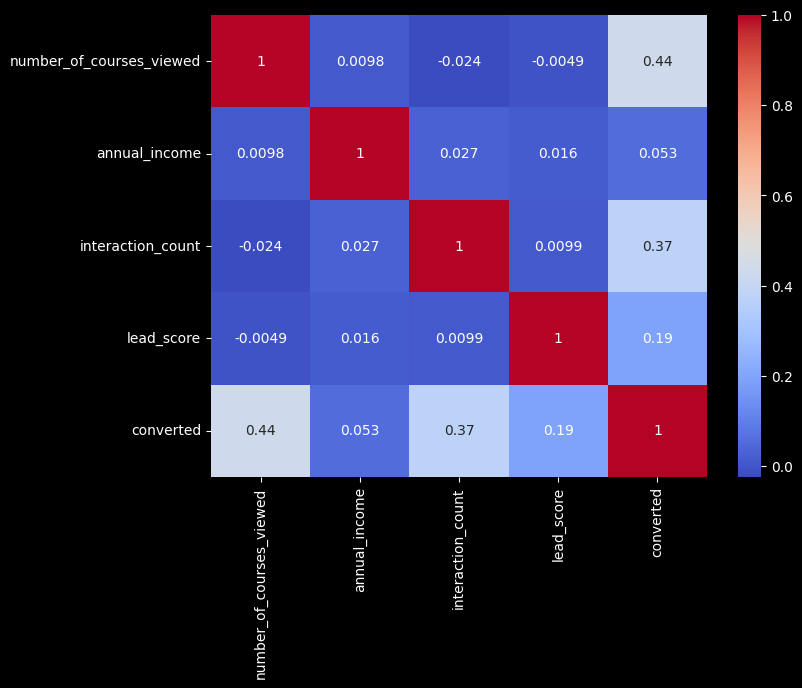

In [914]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

- `0.0099`  | `interaction_count` and `lead_score`
- `-0.0049` | `number_of_courses_viewed` and `lead_score`
- `-0.024`  | `number_of_courses_viewed` and `interaction_count`
- `0.027`   | `annual_income` and `interaction_count`

> `annual_income` and `interaction_count`

### Split the data

* Split your data in train/val/test sets with 60%/20%/20% distribution.
* Use Scikit-Learn for that (the `train_test_split` function) and set the seed to `42`.
* Make sure that the target value `y` is not in your dataframe.


In [915]:
from sklearn.model_selection import train_test_split

In [916]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [917]:
len(df_train), len(df_val), len(df_test)

(876, 293, 293)

In [918]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [919]:
y_train = df_train['converted'].values
y_val = df_val['converted'].values
y_test = df_test['converted'].values

del df_train['converted']
del df_val['converted']
del df_test['converted']

In [920]:
categorical_columns = list(df_train.dtypes[df_train.dtypes == 'object'].index)
numerical_columns = list(df_train.dtypes[df_train.dtypes != 'object'].index)


### Question 3

* Calculate the mutual information score between `y` and other categorical variables in the dataset. Use the training set only.
* Round the scores to 2 decimals using `round(score, 2)`.

Which of these variables has the biggest mutual information score?
  
- `industry`
- `location`
- `lead_source`
- `employment_status`



In [921]:
from sklearn.metrics import mutual_info_score

In [922]:
def mutual_info_lead_score(series):
    return mutual_info_score(series, df_full_train.converted)

In [923]:
mi = df_full_train[categorical_columns].apply(mutual_info_lead_score)
mi.sort_values(ascending=False)

lead_source          0.024562
employment_status    0.012690
industry             0.008173
location             0.001212
dtype: float64

> lead_source


### Question 4

* Now let's train a logistic regression.
* Remember that we have several categorical variables in the dataset. Include them using one-hot encoding.
* Fit the model on the training dataset.
    - To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
    - `model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)`
* Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

What accuracy did you get?

- 0.64
- 0.74
- 0.84
- 0.94



In [924]:
from sklearn.feature_extraction import DictVectorizer

In [925]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical_columns + numerical_columns].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[categorical_columns + numerical_columns].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [926]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict_proba(X_val)[:, 1]
y_pred_label = (y_pred >= 0.5)

In [927]:
from sklearn.metrics import accuracy_score

In [928]:
acc = accuracy_score(y_val, y_pred_label)
print(round(acc, 2))

0.7


> 0.74 {0.7}


### Question 5 

* Let's find the least useful feature using the *feature elimination* technique.
* Train a model using the same features and parameters as in Q4 (without rounding).
* Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
* For each feature, calculate the difference between the original accuracy and the accuracy without the feature. 

Which of following feature has the smallest difference?

- `'industry'`
- `'employment_status'`
- `'lead_score'`

> **Note**: The difference doesn't have to be positive.



In [929]:
features_to_check = ['industry', 'employment_status', 'lead_score']
original_acc = acc

In [930]:
for feature in features_to_check:
    selected_features = [f for f in (categorical_columns + numerical_columns) if f != feature]

    train_dict = df_train[selected_features].to_dict(orient='records')
    X_train = dv.fit_transform(train_dict)
    val_dict = df_val[selected_features].to_dict(orient='records')
    X_val = dv.transform(val_dict)

    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict_proba(X_val)[:, 1]
    y_pred_label = (y_pred >= 0.5)
    
    acc_new = accuracy_score(y_val, y_pred_label)
    print(f"{feature}: {original_acc - acc_new:.4f}")

industry: 0.0000
employment_status: -0.0034
lead_score: 0.0000


> industry {?} {0.0000} {same as : lead_score}


### Question 6

* Now let's train a regularized logistic regression.
* Let's try the following values of the parameter `C`: `[0.01, 0.1, 1, 10, 100]`.
* Train models using all the features as in Q4.
* Calculate the accuracy on the validation dataset and round it to 3 decimal digits.

Which of these `C` leads to the best accuracy on the validation set?

- 0.01
- 0.1
- 1
- 10
- 100

> **Note**: If there are multiple options, select the smallest `C`.


In [931]:
C_list = [0.01, 0.1, 1, 10, 100]

for C in C_list:
    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict_proba(X_val)[:, 1]
    y_pred_label = (y_pred >= 0.5)
    
    acc = accuracy_score(y_val, y_pred_label)
    print(f"C={C}: {round(acc, 3)}")

C=0.01: 0.703
C=0.1: 0.703
C=1: 0.7
C=10: 0.7
C=100: 0.7


> 0.01


## Submit the results

* Submit your results here: https://courses.datatalks.club/ml-zoomcamp-2025/homework/hw03
* If your answer doesn't match options exactly, select the closest one